This notebook implements the dictionary trick as defined in Caligiuri et al. 2023

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import dictionary_generation

# Algorithm steps

1) Generate G1 as ER(p)
2) iteratively construct Gk+1 from Gk by rewiring a link that 
    (i) has not been rewired in any previous iteration of the algorithm, 
    (ii) into a place that did not have a link in any previous iteration of the algorithm



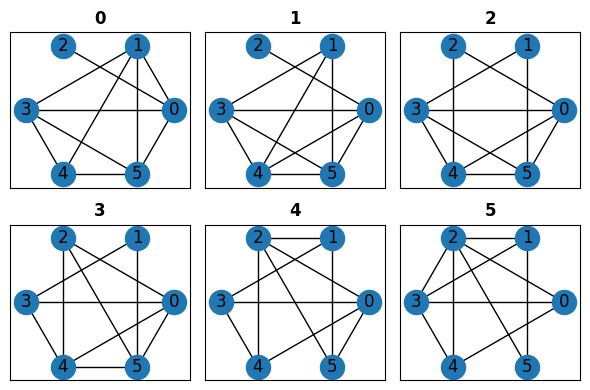

In [52]:
m = 6  # number of nodes the graphs have
p = 0.5 # probability of the links between them
seed = 201610  # seed random number generators for reproducibility
L = 6 # Length of dictionary

D, D_metric  = dictionary_generation.generate_dictionary(m, p, L, seed)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(6,4), dpi=100)
axs = np.ravel(axs)

for iG, G in zip(range(len(D)), D):
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos, ax=axs[iG])

    axs[iG].set_title(f"{iG}", fontweight="bold")
    axs[iG].set_xticks([])
    axs[iG].set_yticks([])
    axs[iG].axis('equal')


fig.tight_layout()
plt.show()

I want to use the dictionary trick to map a chaotic time series into a temporal network.

Generate a chaotic time series

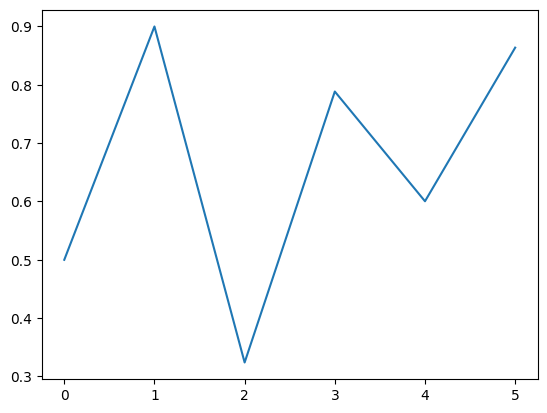

In [53]:
r_chaos = 3.6

def logistic(x, r):
    return r*x* (1-x)

n = 6
y = np.empty((n,))
y[0] = 0.5

for i in range(1, n):
    y[i] = logistic(y[i-1], r_chaos)

fig = plt.Figure(figsize=(2,2))
plt.plot(range(n), y)


In [54]:
tn, ks = dictionary_generation.encode_ts_into_tn(y, D, D_metric)


To summarize, we generate a sequence $\{tn\}$ of $L$ graphs. We also generate a sequence $\{y\}$ of $n$ numbers. We scale $\{y\}$ to the interval $[0,1]$ if it isn't already and then we map elements in $\{y\}$ into elements in $\{tn\}$. Doing this is not bijective, since we cannot recover the value in $\{y\}$ from the mapped element in $\{tn\}$. Also, the graphs in $\{tn\}$ subsample the space of all possible graphs of $m$ nodes. In other words, $\{tn\}$ is does not cover the space of graphs with $m$ fully.

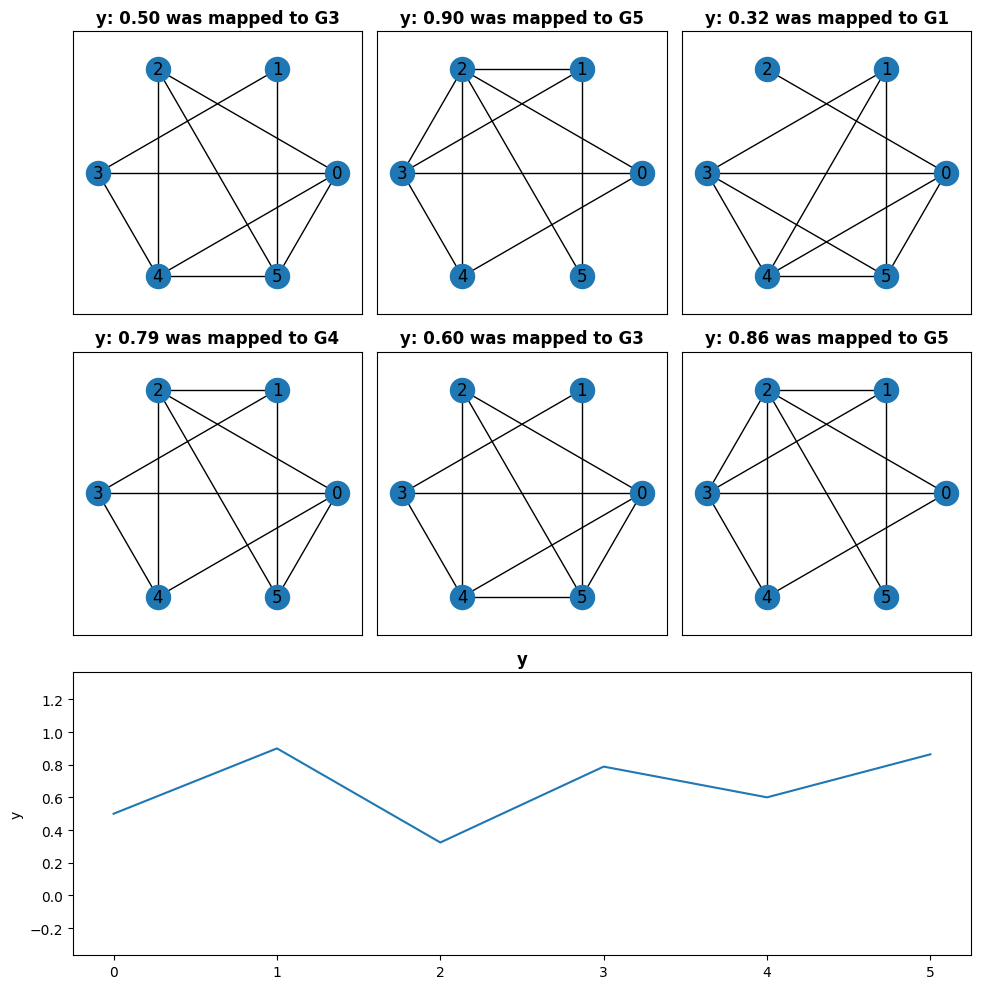

In [55]:
import matplotlib.gridspec as gridspec

#fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(6,4), dpi=100)
fig = plt.figure(tight_layout=True, figsize=(10,10))
gs = gridspec.GridSpec(3, 3)

for iG, G in zip(range(len(tn)), tn):
    ax = fig.add_subplot(gs[iG//3, iG %3])
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos, ax=ax)

    ax.set_title(f"y: {y[iG]:.2f} was mapped to G{ks[iG]}", fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('equal')




ax = fig.add_subplot(gs[-1, :])
ax.plot(y)
ax.set_title("y", fontweight="bold")
ax.axis('equal')
ax.set_ylim(bottom=0.0,top=1.0)
ax.set_ylabel('y')

fig.tight_layout()
plt.show()